In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

In [30]:
data = np.loadtxt('data/perovskite_data.txt')

# Shuffle data
I_perm = np.random.permutation(len(data))
data = data[I_perm, :]

# Class data - whether we form Perovskite or not
c = data[:, 0]

# Extract all but the 0-th column
X = data[:, 1:]

# Normalize data
X = (X - np.mean(X, axis=0))/np.std(X, axis = 0)

In [31]:
# Training, validation and testing set
num_points = len(c)
num_train = int(0.8*0.8*num_points)
num_valid = int(0.8*0.2*num_points)
num_test = len(c) - num_train - num_valid

X_train = X[:num_train, :]
c_train = c[:num_train]

X_valid = X[num_train:(num_train + num_valid), :]
c_valid = c[num_train:(num_train + num_valid)]

# get the last "num_test" rows
X_test = X[-num_test:, :]
c_test = c[-num_test:]

print("         Total data size: " + str(num_points))
print("  Training data set size: " + str(num_train))
print("Validation data set size: " + str(num_valid))
print("   Testing data set size: " + str(num_test))

         Total data size: 355
  Training data set size: 227
Validation data set size: 56
   Testing data set size: 72


# Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [32]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 3, max_samples = 0.5)
model.fit(X_train, c_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=3,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# check with testing data
c_valid_model = model.predict(X_valid)

# Precision, recall confusion matrix
precision = precision_score(c_valid, c_valid_model)
recall = recall_score(c_valid, c_valid_model)
acc = accuracy_score(c_valid, c_valid_model)
f1 = f1_score(c_valid, c_valid_model)

print("Bagging:")
print("Precision = " + str(precision))
print("   Recall = " + str(recall))
print(" Accuracy = " + str(acc))
print("       F1 = " + str(acc))

Bagging:
Precision = 0.8536585365853658
   Recall = 0.9722222222222222
 Accuracy = 0.875
       F1 = 0.875


In [34]:
n_estimators = range(1, 10)
max_samples = np.linspace(0.05, 1.0, 10)
accuracies = np.zeros([len(n_estimators), len(max_samples)])

for i, n in enumerate(n_estimators):
    for j, s in enumerate(max_samples):
        model = BaggingClassifier(n_estimators = n, max_samples = s)
        model.fit(X_train, c_train)
        c_valid_model = model.predict(X_valid)
        accuracies[i,j] = accuracy_score(c_valid, c_valid_model)

In [35]:
# flat index of best accuracy
ij_max = np.argmax(accuracies)
print(ij_max)

47


In [36]:
# Convert back into (i,j) pair
ij_max = np.unravel_index(ij_max, accuracies.shape)
print(ij_max)

(4, 7)


In [37]:
best_n = n_estimators[ij_max[0]]
best_s = max_samples[ij_max[1]]

model = BaggingClassifier(n_estimators = best_n, max_samples = best_s)
model.fit(X_train, c_train)
c_valid_model = model.predict(X_valid)

# score best model
precision = precision_score(c_valid, c_valid_model)
recall = recall_score(c_valid, c_valid_model)
acc = accuracy_score(c_valid, c_valid_model)
f1 = f1_score(c_valid, c_valid_model)

print("Bagging:")
print("Precision = " + str(precision))
print("   Recall = " + str(recall))
print(" Accuracy = " + str(acc))
print("       F1 = " + str(acc))

Bagging:
Precision = 0.9210526315789473
   Recall = 0.9722222222222222
 Accuracy = 0.9285714285714286
       F1 = 0.9285714285714286


# Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 3)
model.fit(X_train, c_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
# check with testing data
c_valid_model = model.predict(X_valid)

# Precision, recall confusion matrix
precision = precision_score(c_valid, c_valid_model)
recall = recall_score(c_valid, c_valid_model)
acc = accuracy_score(c_valid, c_valid_model)
f1 = f1_score(c_valid, c_valid_model)

print("Random Forest:")
print("Precision = " + str(precision))
print("   Recall = " + str(recall))
print(" Accuracy = " + str(acc))
print("       F1 = " + str(acc))

Random Forest:
Precision = 0.875
   Recall = 0.9722222222222222
 Accuracy = 0.8928571428571429
       F1 = 0.8928571428571429


Text(0.5, 0, 'Importance')

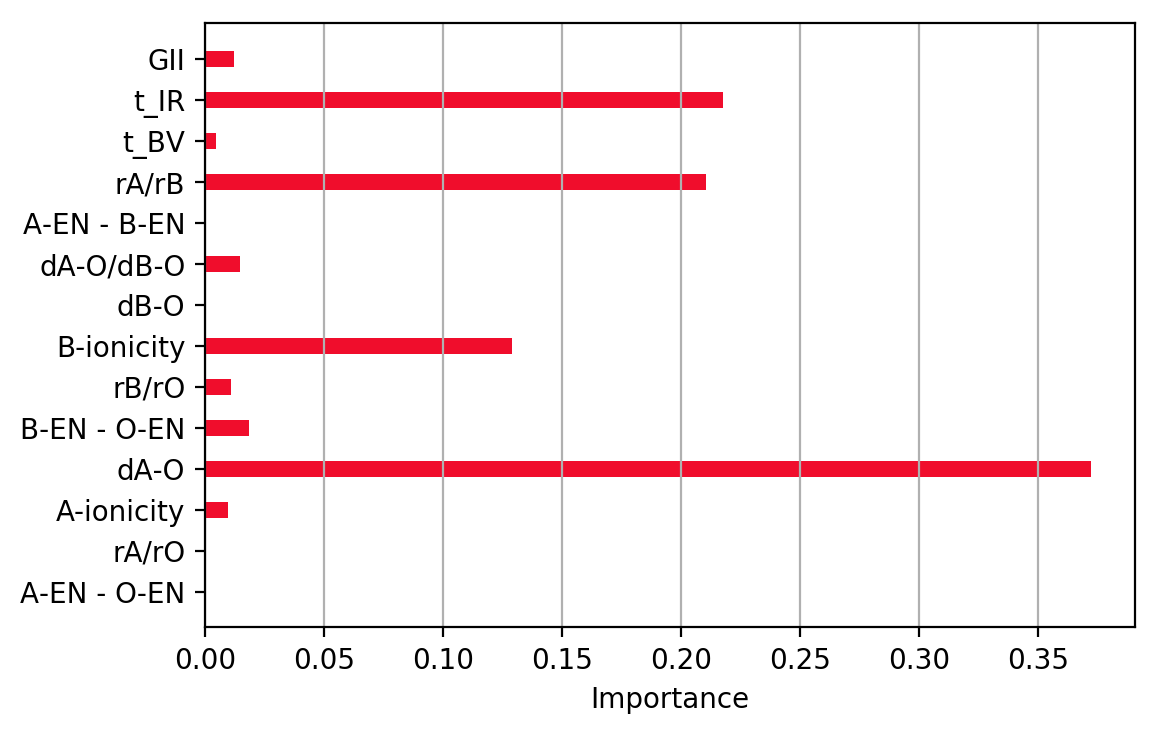

In [40]:
importances = model.feature_importances_

# Plot the features importances using a bar chart
feature_names = ["A-EN - O-EN", "rA/rO", "A-ionicity", "dA-O", "B-EN - O-EN", "rB/rO", "B-ionicity", "dB-O", "dA-O/dB-O", "A-EN - B-EN", "rA/rB", "t_BV", "t_IR", "GII"]
x_plot = [2*i for i in range(len(importances))]
plt.barh(x_plot, model.feature_importances_)
plt.yticks(x_plot, feature_names)
plt.grid(axis = 'x')
plt.xlabel('Importance')

# Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, c_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [42]:
# check with testing data
c_valid_model = model.predict(X_valid)

# Precision, recall confusion matrix
precision = precision_score(c_valid, c_valid_model)
recall = recall_score(c_valid, c_valid_model)
acc = accuracy_score(c_valid, c_valid_model)
f1 = f1_score(c_valid, c_valid_model)

print("Adaboost:")
print("Precision = " + str(precision))
print("   Recall = " + str(recall))
print(" Accuracy = " + str(acc))
print("       F1 = " + str(acc))

Adaboost:
Precision = 0.9230769230769231
   Recall = 1.0
 Accuracy = 0.9464285714285714
       F1 = 0.9464285714285714


In [43]:
# get the individual classifiers
individual_models = model.estimators_

# individual model predictions
individual_acc = np.zeros(len(individual_models))
for i, model_i in enumerate(individual_models):
    # check with testing data
    c_valid_model = model_i.predict(X_valid)
    
    # convert to -1
    c_valid_model[c_valid_model == 0] = -1
    
    # accuracy
    individual_acc[i] = accuracy_score(c_valid, c_valid_model)

Text(0.5, 1.0, 'Adaboost: individual model accuracies')

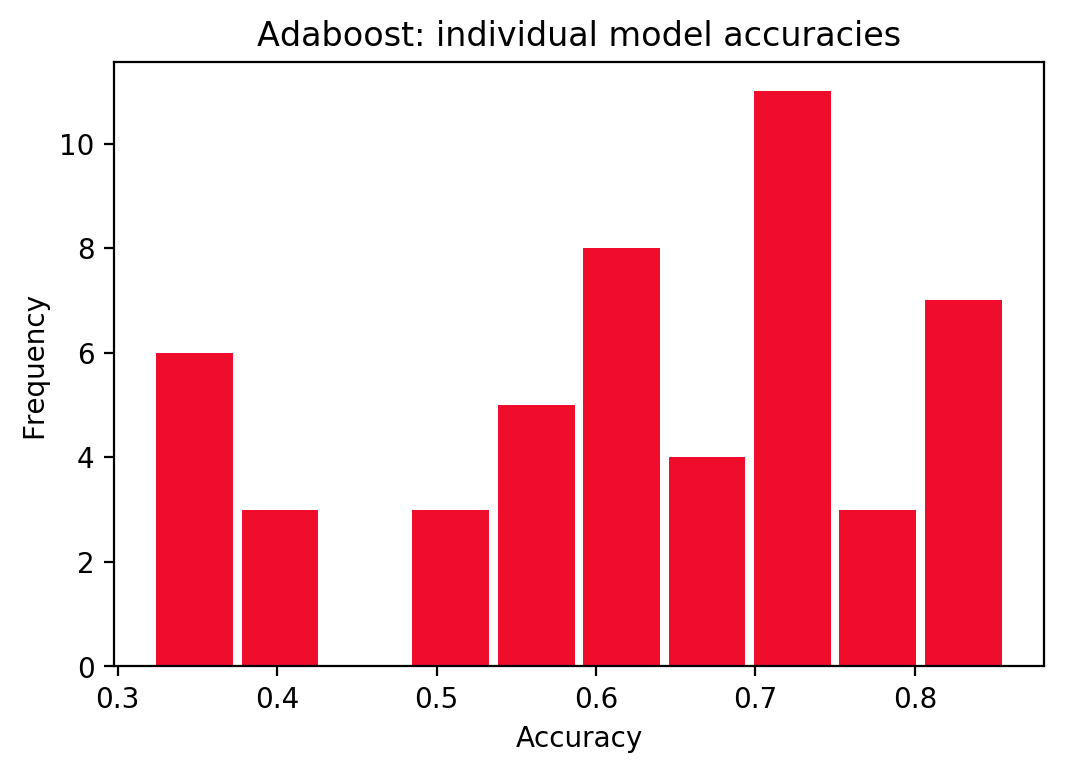

In [44]:
plt.hist(individual_acc, rwidth=0.9)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Adaboost: individual model accuracies')

In [45]:
print(np.mean(individual_acc))

0.6232142857142857


In [46]:
# Compare to random forest
model = BaggingClassifier(n_estimators = 50, max_samples = best_s)
model.fit(X_train, c_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.788888888888889,
                  n_estimators=50, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [47]:
# get the individual classifiers
individual_models = model.estimators_

# individual model predictions
individual_acc = np.zeros(len(individual_models))
for i, model_i in enumerate(individual_models):
    # check with testing data
    c_valid_model = model_i.predict(X_valid)
    
    c_valid_model[c_valid_model == 0] = -1
    
    # accuracy
    individual_acc[i] = accuracy_score(c_valid, c_valid_model)

In [48]:
print(np.mean(individual_acc))

0.8910714285714285


Text(0.5, 1.0, 'Bagging: individual model accuracies')

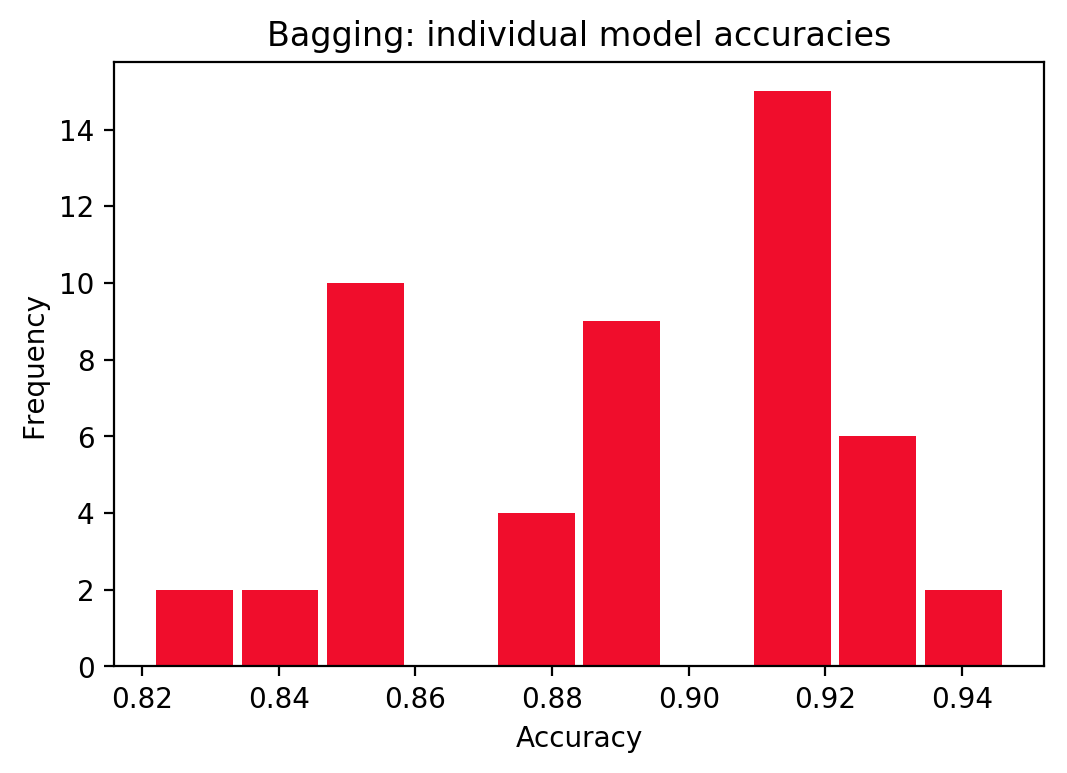

In [49]:
plt.hist(individual_acc, rwidth=0.9)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bagging: individual model accuracies')